# 3-2. 카테고리별 워드클라우드 시각화

In [6]:
import pandas as pd
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

In [7]:
# 선제품 전처리 리뷰 데이터 불러오기
suncream_df = pd.read_csv("./preprocessed_data/preprocessed_suncream_data.csv",encoding ="utf-8",low_memory=False)
sunstic_df = pd.read_csv("./preprocessed_data/preprocessed_sunstic_data.csv",encoding ="utf-8")
suncushion_df = pd.read_csv("./preprocessed_data/preprocessed_suncushion_data.csv",encoding ="utf-8")
sunpatch_df = pd.read_csv("./preprocessed_data/preprocessed_sunpatch_data.csv",encoding ="utf-8")
sunspray_df = pd.read_csv("./preprocessed_data/preprocessed_sunspray_data.csv",encoding ="utf-8")

In [8]:
# 문자열로 표현된 리스트를 리스트데이터로 변환
from tqdm.notebook import tqdm

tqdm.pandas()
def process_reviews(dfs, column_name='processed_review'):
    for df in dfs:
        df[column_name] = df[column_name].progress_apply(lambda x: eval(x))

dataframes = [suncream_df, sunstic_df, suncushion_df, sunpatch_df, sunspray_df]

process_reviews(dataframes)

  0%|          | 0/139007 [00:00<?, ?it/s]

  0%|          | 0/25743 [00:00<?, ?it/s]

  0%|          | 0/14358 [00:00<?, ?it/s]

  0%|          | 0/2544 [00:00<?, ?it/s]

  0%|          | 0/1559 [00:00<?, ?it/s]

In [9]:
# 각 카테고리별로 키워드 수 세기
from collections import Counter, defaultdict

def count_words(dfs, column_name='processed_review'):
    
    word_count_dict = defaultdict(Counter)
    
    for df, key in zip(dfs, ['suncream', 'sunstic', 'suncushion', 'sunpatch', 'sunspray']):
        for review in df[column_name]:
            c = Counter([x for x in review])
            word_count_dict[key] += c
    
    return word_count_dict


dataframes = [suncream_df, sunstic_df, suncushion_df, sunpatch_df, sunspray_df]

word_count_dict = count_words(dataframes)


In [10]:
# 선크림 워드 클라우드
suncream_word_cloud = WordCloud(
    font_path = 'C:/Windows/Fonts/Malgun.ttf',
    background_color="white",
    colormap="brg",
).generate_from_frequencies(word_count_dict["suncream"])

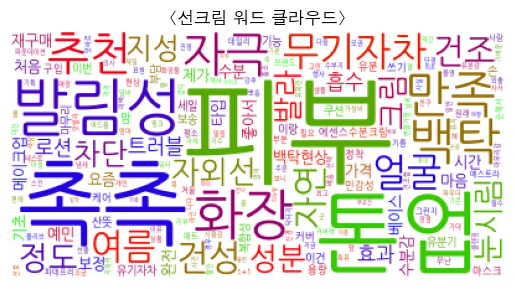

In [11]:
plt.title("<선크림 워드 클라우드>")
plt.imshow(suncream_word_cloud)
plt.axis('off')  # 테두리와 축 제거
plt.show()

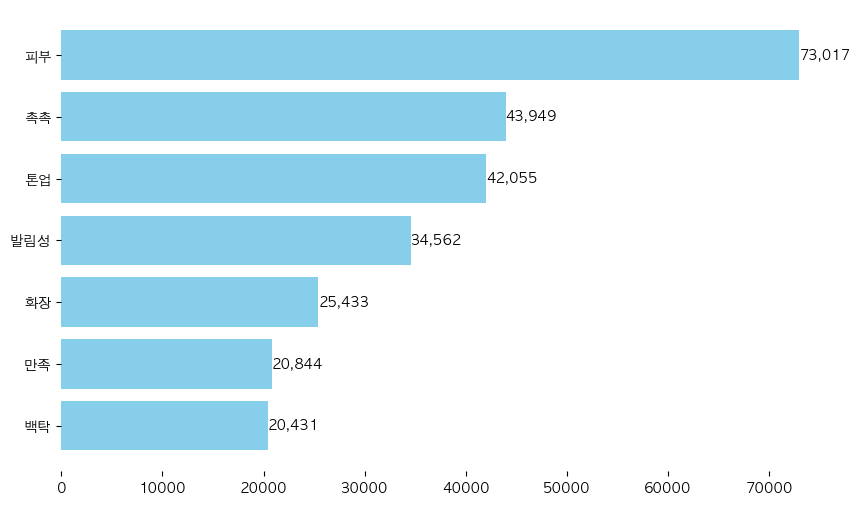

In [12]:
# 선크림 top7 키워드
most_common = word_count_dict["suncream"].most_common(7)
labels, values = zip(*most_common)

plt.figure(figsize=(10, 6))  
plt.barh(labels, values, color='skyblue')

for i in range(len(values)):
    plt.text(values[i], i, f'{values[i]:,}', ha='left', va='center', color='black')

plt.gca().invert_yaxis()


for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [13]:
# 선스틱 워드 클라우드
sunstic_word_cloud = WordCloud(
    font_path = 'C:/Windows/Fonts/Malgun.ttf',
    background_color="white",
    colormap="brg",
).generate_from_frequencies(word_count_dict["sunstic"])

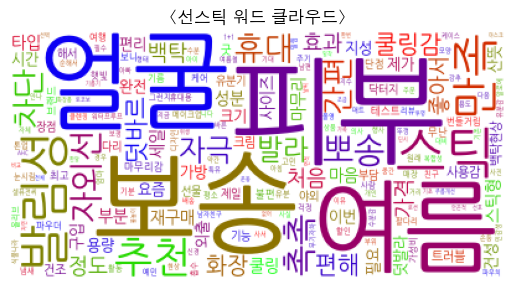

In [14]:
plt.title("<선스틱 워드 클라우드>")
plt.imshow(sunstic_word_cloud)
plt.axis('off')  # 테두리와 축 제거
plt.show()

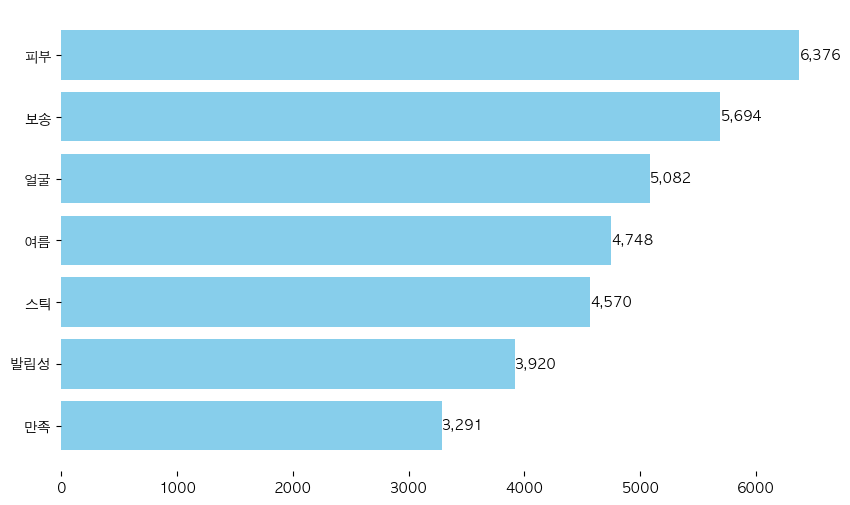

In [15]:
# 선스틱 top 7 키워드
most_common = word_count_dict["sunstic"].most_common(7)
labels, values = zip(*most_common)


plt.figure(figsize=(10, 6))  
plt.barh(labels, values, color='skyblue')


for i in range(len(values)):
    plt.text(values[i], i, f'{values[i]:,}', ha='left', va='center', color='black')

plt.gca().invert_yaxis()

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [16]:
# 선쿠션 워드 클라우드
suncushion_word_cloud = WordCloud(
    font_path = 'C:/Windows/Fonts/Malgun.ttf',
    background_color="white",
    colormap="brg",
).generate_from_frequencies(word_count_dict["suncushion"])

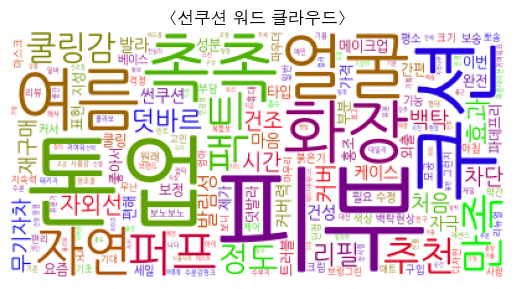

In [17]:
plt.title("<선쿠션 워드 클라우드>")
plt.imshow(suncushion_word_cloud)
plt.axis('off')  # 테두리와 축 제거
plt.show()

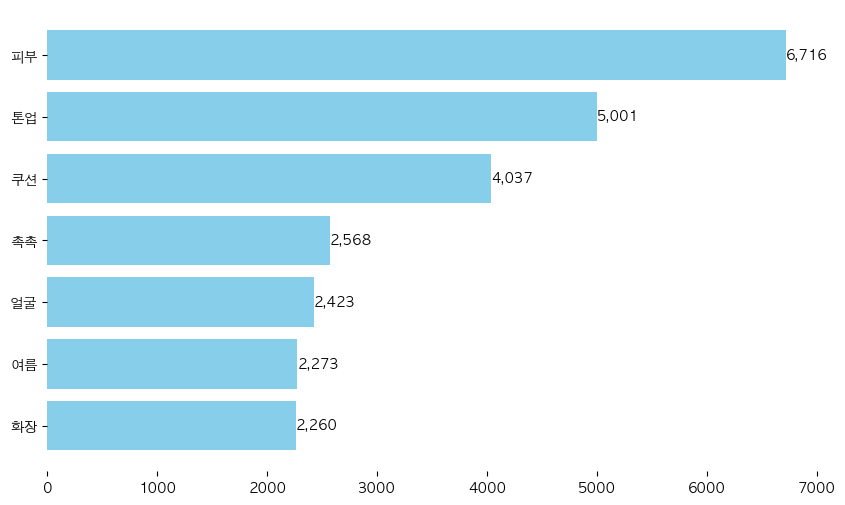

In [18]:
# 선쿠션 top7 키워드
most_common = word_count_dict["suncushion"].most_common(7)
labels, values = zip(*most_common)


plt.figure(figsize=(10, 6))  
plt.barh(labels, values, color='skyblue')


for i in range(len(values)):
    plt.text(values[i], i, f'{values[i]:,}', ha='left', va='center', color='black')


plt.gca().invert_yaxis()

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [19]:
# 선패치 워드클라우드
sunpatch_word_cloud = WordCloud(
    font_path = 'C:/Windows/Fonts/Malgun.ttf',
    background_color="white",
    colormap="brg",
).generate_from_frequencies(word_count_dict["sunpatch"])

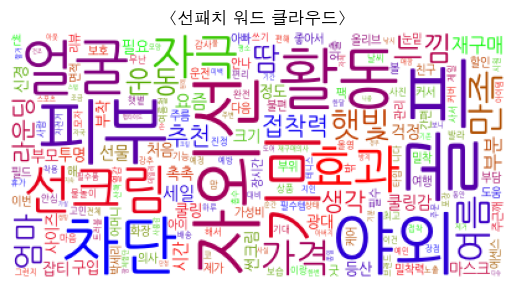

In [20]:
plt.title("<선패치 워드 클라우드>")
plt.imshow(sunpatch_word_cloud)
plt.axis('off')  # 테두리와 축 제거
plt.show()

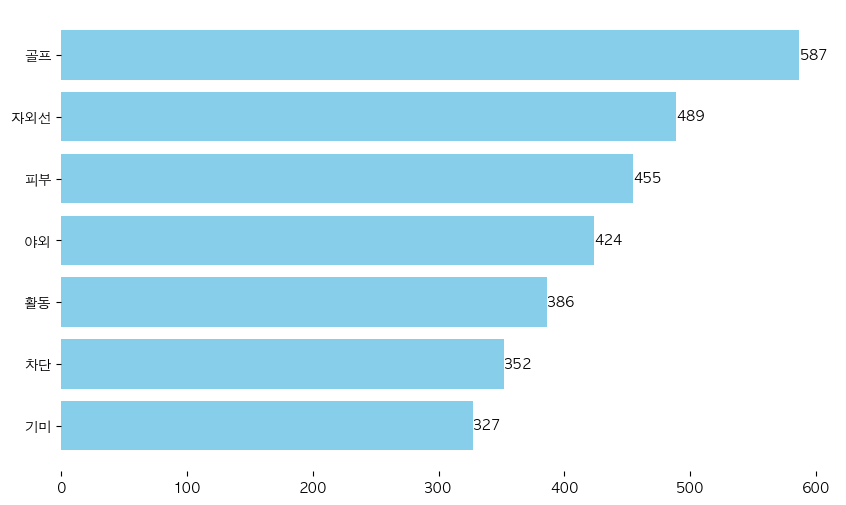

In [21]:
# 선패치 top7 키워드
most_common = word_count_dict["sunpatch"].most_common(7)
labels, values = zip(*most_common)


plt.figure(figsize=(10, 6)) 
plt.barh(labels, values, color='skyblue')


for i in range(len(values)):
    plt.text(values[i], i, f'{values[i]:,}', ha='left', va='center', color='black')

plt.gca().invert_yaxis()

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [22]:
# 선스프레이 워드 클라우드
sunspray_word_cloud = WordCloud(
    font_path = 'C:/Windows/Fonts/Malgun.ttf',
    background_color="white",
    colormap="brg",
).generate_from_frequencies(word_count_dict["sunspray"])

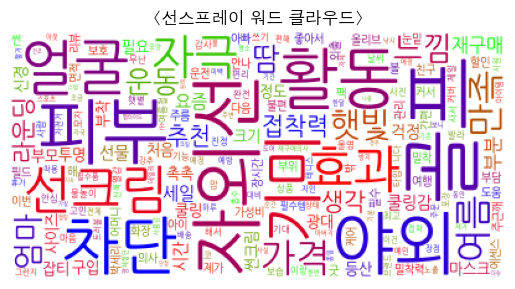

In [23]:
plt.title("<선스프레이 워드 클라우드>")
plt.imshow(sunpatch_word_cloud)
plt.axis('off')  
plt.show()

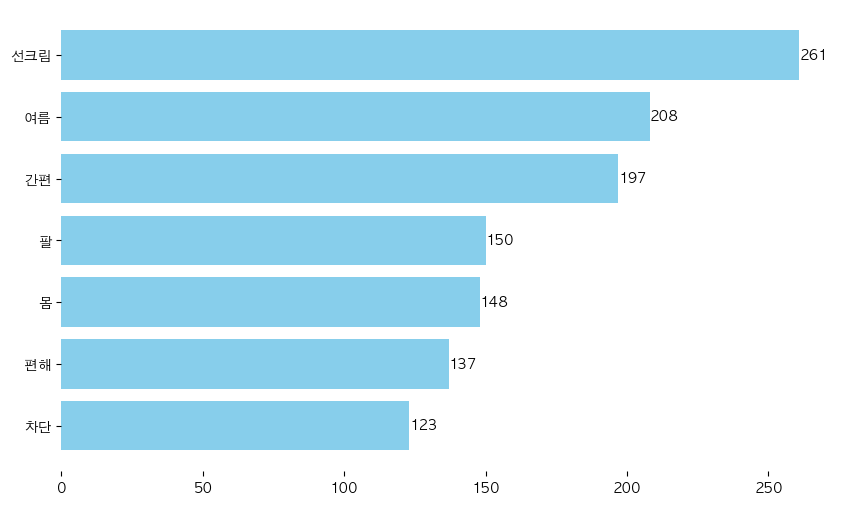

In [24]:
# 선스프레이 top7 키워드
most_common = word_count_dict["sunspray"].most_common(7)
labels, values = zip(*most_common)


plt.figure(figsize=(10, 6))  
plt.barh(labels, values, color='skyblue')


for i in range(len(values)):
    plt.text(values[i], i, f'{values[i]:,}', ha='left', va='center', color='black')


plt.gca().invert_yaxis()

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()